 ### Kütüphaneleri import ediyoruz.

In [148]:
#ilk olarak ilgili kütüphaneleri import ediyoruz.

import numpy as np  # lineer cebir için 
import pandas as pd  # veri analizi için
import seaborn as sns
import math
import matplotlib.pyplot as plt
from datetime import datetime # saat ve tarih ile ilgili kütüphane

from mlxtend.regressor import StackingCVRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

#normalizasyon ve standardizasyon
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from xgboost import XGBRegressor
from scipy.stats import norm, skew
import os
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 800

#Sütunlar arasındaki maksimum değeri göstermek için
pd.options.display.max_columns = 80
pd.options.display.max_rows = 200
from sklearn.neural_network import MLPRegressor

%matplotlib inline

### Sadece tek bir veri seti yükledik. İçinde test ve train verilerinin bulunan ve daha sonra ayrıştıracağımız bir veri setidir

In [138]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
!ls "/content/drive/My Drive/Colab Notebooks/kc_house_data.csv"

'/content/drive/My Drive/Colab Notebooks/kc_house_data.csv'


In [144]:
data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/kc_house_data.csv")


In [145]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [153]:
data["long"]


0       -122.257
1       -122.319
2       -122.233
3       -122.393
4       -122.045
          ...   
21608   -122.346
21609   -122.362
21610   -122.299
21611   -122.069
21612   -122.299
Name: long, Length: 21613, dtype: float64

In [142]:
data['long'] = data['long'].abs()

In [143]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,122.069,1410,1287


## veri setinin incelemesini gerçekleştiriyoruz.


In [8]:
print("Data shape:", data.shape[0], "sales and" , data.shape[1], "features")

Data shape: 21613 sales and 21 features


Veri setinde, 21613 satış verisi ve 21 adet özellik bulunmaktadır!

In [9]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,122.045,1800,7503


In [10]:
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,122.299,1020,1357


## id sütunu işimize yaramayacağı içib buradaki setten çıkarıyoruz.


In [11]:
#id sütunu işimize yaramayacağı içib buradaki setten çıkarıyoruz.
data_id = data["id"]
data.drop(["id"], axis=1, inplace = True)
data.shape

(21613, 20)

## date sütununu da çıkaralım.


In [12]:
#date sütununu da çıkaralım.
data_date = data["date"]
data.drop(["date"],axis=1, inplace = True)
data.shape

(21613, 19)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

## tahmin etmek istediğimiz price değerini yakından inceleyecek olursak eğer;


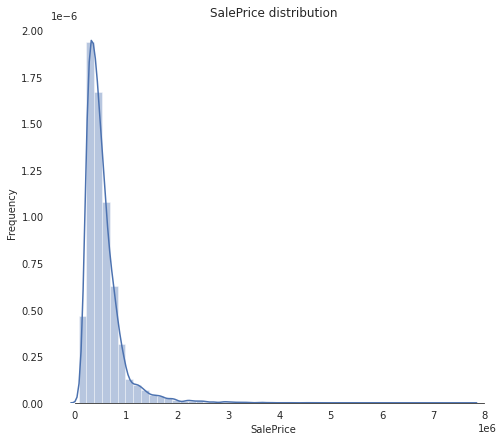

In [14]:
   
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))

#Grafiğin dağılımına bakalım.

sns.distplot(data['price'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

In [15]:
# Çarpıklık ve basıklık durumunu inceliyoruz.
print("Skewness: %f" % data['price'].skew())
print("Kurtosis: %f" % data['price'].kurt())

Skewness: 4.024069
Kurtosis: 34.585540


## veri setimizde bulunan özelliklerin birbirleri arasındaki ilişkiyi inceliyoruz.


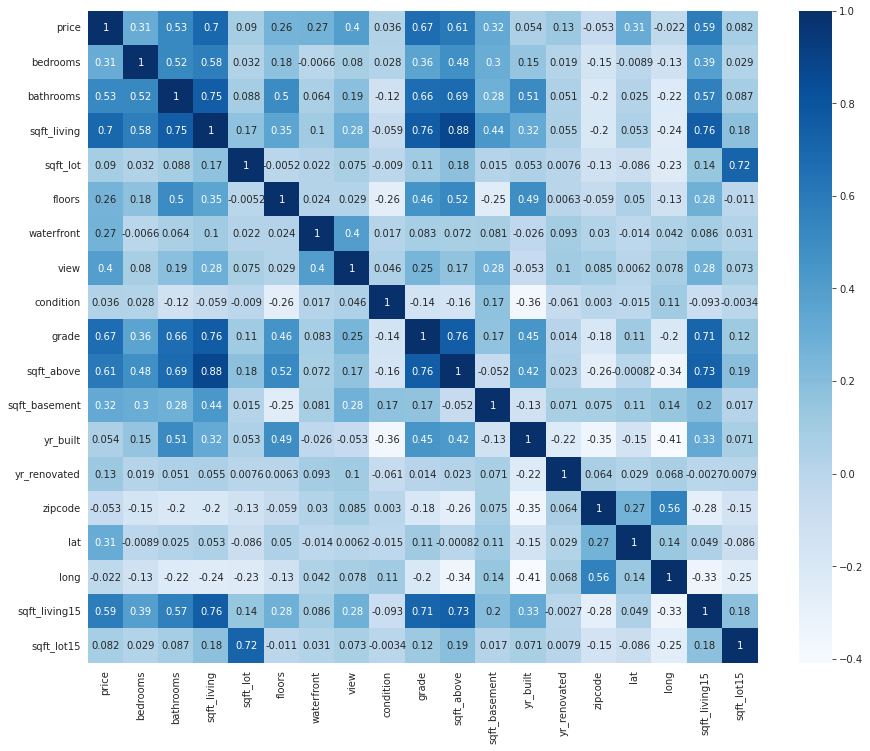

In [16]:
#veri setimizde bulunan özelliklerin birbirleri arasındaki ilişkiyi inceliyoruz.

plt.subplots(figsize=(15,12))
sns.heatmap(data.corr(), annot=True, cmap="Blues")


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [18]:
data.max(axis = 1, skipna = True)


0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Length: 21613, dtype: float64

In [19]:
# Sayısal değerleri olan özelliklerin keşifini yapıyoruz.
numeric_dtypes = [ 'int64', 'float64']
numeric = []

for i in data.columns:
    if data[i].dtype in numeric_dtypes:
        if i in data:
            numeric.append(i)   

In [20]:
numeric

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [21]:
data["price"]


0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [22]:
print(data["price"].describe())

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


## Çarpıklık ve basıklık durumunu inceliyoruz.


Price özelliğinin heat_map'ten en fazla ilişkisi bulunan (0,1) aralığı için x>0.50 üzerindeki değerler için ne kadar etkiliyor, bunların grafiklerini çizdirelim.

>sqft_living = 0.7
>grade = 0.67
>sqft_above = 0.61
>sqft_living = 0.59

## sqft_living  ile price arasındaki ilişkiyi buradan görebiliriz.


 ## grade ve price arasındaki ilişki

## sqft_above ile price arasındaki ilikşi


## sqft_living15 ile price arasındaki ilişki


## Feature Engineering

### Öncelikle price değerini  grafiksel olarak çizdirelim.

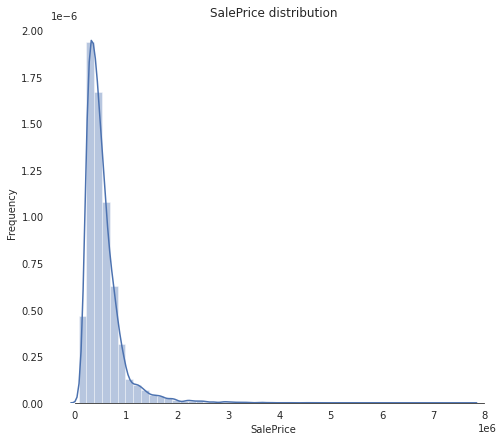

In [23]:
#ilk olarak price dağılımını tekrardan bir çizdirelim.

#tahmin etmek istediğimiz price değerini yakından inceleyecek olursak eğer;
    
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))

#Grafiğin dağılımına bakalım.

sns.distplot(data['price'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

# SALI ------------------------------------------------------------
### Logaritma işlemini yapmadan önce test ve train verilerimizi ayıralım.


### giriş ve çıkış değerlerini böl


In [24]:
#giriş ve çıkış değerlerini böl
X, y = data[["bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade", "sqft_above","sqft_basement","yr_built","yr_renovated","zipcode","lat", "long","sqft_living15","sqft_lot15"]] , data["price"]
print(X.shape,y.shape)

(21613, 18) (21613,)


### train ve test verilerini ayrıştıralım

In [25]:
#train ve test verilerini ayrıştıralım.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17290, 18) (4323, 18) (17290,) (4323,)


### Test ve train verilerinin hepsinin ayrı ayrı logunu alıyoruz.

### y_train ve logaritmik y_train karşılaştırması

In [26]:
X_train_log = np.log1p(X_train)
y_train_log = np.log1p(y_train)
X_test_log  = np.log1p(X_test)
y_test_log = np.log1p(y_test)


## Train edilmiş değerlerin logaritmik ifadeleri ile karşılaştırılması

Text(0.5, 0, 'Log X_test')

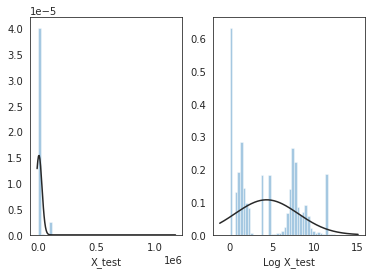

In [27]:
plt.subplot(1, 2, 1)
sns.distplot(X_test, kde=False, fit = norm)
plt.xlabel("X_test")
plt.subplot(1, 2, 2)
sns.distplot(X_test_log, kde=False, fit = norm)
plt.xlabel('Log X_test')

Text(0.5, 0, 'Log X_train')

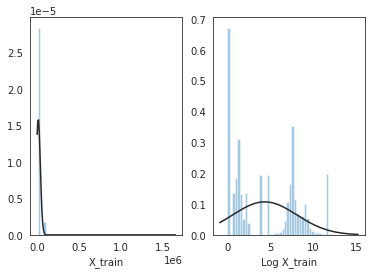

In [28]:
plt.subplot(1, 2, 1)
sns.distplot(X_train, kde=False, fit = norm)
plt.xlabel("X_train")
plt.subplot(1, 2, 2)
sns.distplot(X_train_log, kde=False, fit = norm)
plt.xlabel('Log X_train')

Text(0.5, 0, 'Log y_train')

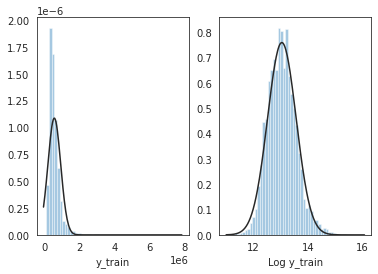

In [29]:
plt.subplot(1, 2, 1)
sns.distplot(y_train, kde=False, fit = norm)
plt.xlabel("y_train")
plt.subplot(1, 2, 2)
sns.distplot(y_train_log, kde=False, fit = norm)
plt.xlabel('Log y_train')

### Dönüştürmeleri kontrol ediyoruz.

In [30]:
y_train_log

3856     13.190024
5010     12.959847
18050    13.592368
570      12.733463
8556     13.918068
           ...    
5520     13.458837
3046     12.865924
20463    13.142168
18638    13.155800
2915     13.028055
Name: price, Length: 17290, dtype: float64

In [31]:
X_train_log

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3856,1.609438,1.252763,7.965893,10.085601,1.098612,0.0,1.386294,1.386294,2.302585,7.965893,0.000000,7.602401,0.0,11.492957,3.875616,4.812225,7.812378,9.741557
5010,1.098612,0.693147,6.431331,8.402007,0.693147,0.0,0.000000,1.386294,1.945910,6.431331,0.000000,7.564238,0.0,11.493926,3.885426,4.815391,7.074117,8.517393
18050,1.609438,1.252763,8.003363,9.729729,1.098612,0.0,0.000000,1.386294,2.484907,8.003363,0.000000,7.596392,0.0,11.493518,3.885932,4.812778,8.114025,9.839109
570,1.609438,1.252763,7.512618,8.632841,1.098612,0.0,0.000000,1.386294,2.079442,7.512618,0.000000,7.602900,0.0,11.493121,3.878615,4.812306,7.512618,8.699348
8556,1.609438,1.252763,8.108021,9.146442,1.098612,0.0,1.386294,1.386294,2.397895,8.108021,0.000000,7.595387,0.0,11.492794,3.882913,4.813111,7.962416,9.374158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520,1.386294,1.011601,7.650169,8.517393,0.916291,0.0,0.000000,1.386294,2.197225,7.650169,0.000000,7.558517,0.0,11.493926,3.885219,4.815107,7.512618,8.343078
3046,1.386294,0.693147,7.193686,9.259226,0.693147,0.0,0.000000,1.386294,2.079442,6.867974,5.916202,7.582738,0.0,11.493080,3.886098,4.813777,7.286876,9.354527
20463,1.386294,1.252763,7.912423,8.873048,1.098612,0.0,0.000000,1.386294,2.197225,7.912423,0.000000,7.607381,0.0,11.494751,3.879372,4.814791,7.664347,9.097508
18638,1.098612,0.916291,7.560601,8.134174,0.693147,0.0,0.000000,1.609438,2.079442,6.867974,6.867974,7.556428,0.0,11.493977,3.883866,4.814612,7.030857,8.134174


### kayıp verilerin dağılımlarını bulalım.


In [32]:
# kayıp verilerin dağılımlarını bulalım.
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

missing = percent_missing(data)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:10]


Percent of missing data


[('price', 0.0),
 ('bedrooms', 0.0),
 ('bathrooms', 0.0),
 ('sqft_living', 0.0),
 ('sqft_lot', 0.0),
 ('floors', 0.0),
 ('waterfront', 0.0),
 ('view', 0.0),
 ('condition', 0.0),
 ('grade', 0.0)]

### Hiç kayıp yok.

### Varsa tekrarlayan satırları sil


In [33]:
# tekrarlayan satırları sil
data = data.loc[:,~data.columns.duplicated()]


### XGB modelini oluşturuyoruz ve bunun hata oranına bakıyoruz.

In [34]:
#modeli oluşturuyoruz.
model = XGBRegressor(random_state=1)
model.fit(X_train,y_train)

[06:52:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [35]:
#tahmin yapalım
yhat = model.predict(X_test)

mae= mean_absolute_error(y_test,yhat)
print("MAE: ", mae)
mse = mean_squared_error(y_test,yhat)
print("MSE: ", mse)
rmse= np.sqrt(mse)
print("RMSE: ", rmse)


MAE:  80716.90878007171
MSE:  18836752163.95818
RMSE:  137247.04792438407


In [36]:
yhat

array([339868.16, 232022.22, 358581.62, ..., 607908.94, 618753.5 ,
       582401.4 ], dtype=float32)

## Normalizasyon işlemi

### X_train'e normalizasyon işlemi uygulanması

In [37]:
scale_x_train = preprocessing.MinMaxScaler()
X_train_norm = scale_x_train.fit_transform(X_train)
print(X_train_norm)

[[0.12121212 0.3125     0.1899696  ... 0.5730897  0.34956522 0.01879044]
 [0.06060606 0.125      0.01823708 ... 0.89700997 0.12521739 0.0049957 ]
 [0.12121212 0.3125     0.19832827 ... 0.62956811 0.50086957 0.02079263]
 ...
 [0.09090909 0.3125     0.17857143 ... 0.83554817 0.29043478 0.00951239]
 [0.06060606 0.1875     0.11702128 ... 0.81727575 0.11652174 0.00316697]
 [0.09090909 0.21875    0.06990881 ... 0.65448505 0.28       0.01048074]]


### X_test'e normalizasyon işlemi uygulanması


In [38]:
X_test_norm = scale_x_train.transform(X_test)
print(X_test_norm)

[[0.12121212 0.3125     0.18389058 ... 0.65863787 0.27826087 0.00708633]
 [0.09090909 0.125      0.06610942 ... 0.78156146 0.23304348 0.00876688]
 [0.09090909 0.125      0.0881459  ... 0.88039867 0.13217391 0.00814314]
 ...
 [0.12121212 0.3125     0.14133739 ... 0.82475083 0.26086957 0.00758027]
 [0.15151515 0.34375    0.16489362 ... 0.71096346 0.34608696 0.00812591]
 [0.12121212 0.3125     0.12613982 ... 0.57475083 0.29043478 0.00556545]]


### y değerlerini reshape ediyoruz

In [39]:
y_train1 = y_train.values.reshape(-1,1)
y_test1 = y_test.values.reshape(-1,1)


### y_train'e normalizasyon işlemi uygulanması

In [40]:
scale_y_train = preprocessing.MinMaxScaler()
y_train_norm = scale_y_train.fit_transform(y_train1)
print(y_train_norm)

[[0.06032787]
 [0.04590164]
 [0.09508197]
 ...
 [0.05704918]
 [0.05796721]
 [0.04983607]]


### y_test'e normalizasyon işlemi uygulanması

In [41]:
y_test_norm = scale_y_train.transform(y_test1)
print(y_test_norm)

[[0.03803279]
 [0.01967213]
 [0.04064918]
 ...
 [0.07593443]
 [0.05311475]
 [0.06557377]]


## Normalize edilmiş veriler ile eğitim: 

In [42]:
#modeli oluşturuyoruz.
model_norm = XGBRegressor(random_state=1)
model_norm.fit(X_train_norm,y_train_norm)

[06:52:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [43]:
#tahmin yapalım
yhat_norm = model_norm.predict(X_test_norm)

In [44]:
yhat_norm1  = yhat_norm.reshape(-1,1)

In [45]:
yhat_norm_reel = scale_y_train.inverse_transform(yhat_norm1)

In [46]:
yhat_norm_reel

array([[329827.47],
       [238124.12],
       [351687.1 ],
       ...,
       [597660.94],
       [640578.  ],
       [572824.44]], dtype=float32)

In [1]:
yhat

NameError: name 'yhat' is not defined

## LOG'lu Normalize ile eğitim

### log >> scale 

### X train logu normalize edelim

In [48]:
scale_x_train_log = preprocessing.MinMaxScaler()
X_train_log_norm = scale_x_train_log.fit_transform(X_train_log)
print(X_train_log_norm)

[[0.45640198 0.570157   0.56658521 ... 0.57428737 0.64559296 0.45313988]
 [0.31154282 0.31546488 0.13681763 ... 0.89746126 0.36172043 0.28306009]
 [0.45640198 0.570157   0.57707911 ... 0.63070933 0.76158084 0.46669337]
 ...
 [0.39312326 0.570157   0.55161057 ... 0.83621967 0.58867261 0.36365858]
 [0.31154282 0.41702188 0.45307972 ... 0.81800563 0.34508656 0.22981737]
 [0.39312326 0.46039942 0.34393723 ... 0.65559146 0.57769095 0.37618753]]


### X test logu normalize edelim

In [49]:
X_test_log_norm = scale_x_train_log.transform(X_test_log)
print(X_test_log_norm)

[[0.45640198 0.570157   0.55869848 ... 0.65973789 0.57582979 0.32618126]
 [0.39312326 0.31546488 0.33296173 ... 0.78239607 0.52397825 0.35317919]
 [0.39312326 0.31546488 0.39135073 ... 0.8809131  0.3745281  0.34376004]
 ...
 [0.45640198 0.570157   0.49623015 ... 0.82545722 0.55670527 0.33467484]
 [0.50810445 0.60155701 0.53251549 ... 0.71196851 0.64246808 0.34349056]
 [0.45640198 0.570157   0.4700496  ... 0.57594729 0.58867261 0.29619847]]


### Y train logu normalize edelim

In [50]:
y_train_log1 = y_train_log.values.reshape(-1,1)


In [51]:
scale_y_train_log = preprocessing.MinMaxScaler()
y_train_log_norm = scale_y_train_log.fit_transform(y_train_log1)
print(y_train_log_norm)

[[0.42422068]
 [0.37452223]
 [0.51109245]
 ...
 [0.41388792]
 [0.41683128]
 [0.38924931]]


### Y test logu normalize edelim

In [52]:
y_test_log1 = y_test_log.values.reshape(-1,1)


In [53]:
scale_y_test_log = preprocessing.MinMaxScaler()
y_test_log_norm = scale_y_test_log.fit_transform(y_test_log1)
print(y_test_log_norm)

[[0.36153313]
 [0.24819043]
 [0.37400047]
 ...
 [0.49816626]
 [0.42569915]
 [0.46800596]]


### Eğitim

In [54]:
#modeli oluşturuyoruz.
model_log_norm = XGBRegressor(random_state=1)
model_log_norm.fit(X_train_log_norm,y_train_log_norm)

[06:53:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [55]:
#tahmin yapalım
yhat_log_norm = model_log_norm.predict(X_test_log_norm)

In [56]:
yhat_log_norm

array([0.3316266 , 0.2311182 , 0.33728737, ..., 0.44722995, 0.4620958 ,
       0.4422964 ], dtype=float32)

In [57]:
yhat_log_norm1  = yhat_log_norm.reshape(-1,1)

### scale >> log

In [58]:
yhat_log_norm_reel = scale_y_train_log.inverse_transform(yhat_log_norm1)

In [59]:
yhat_log_norm_reel

array([[12.761176],
       [12.295675],
       [12.787395],
       ...,
       [13.296591],
       [13.365441],
       [13.273741]], dtype=float32)

In [60]:
#logaritmadan kurtarıyoruz
y_hat_log_norm_reel = (math.e)**yhat_log_norm_reel

In [61]:
y_hat_log_norm_reel = y_hat_log_norm_reel.reshape(1,-1)

In [62]:
y_hat_log_norm_reel

array([[348424.1 , 218747.83, 357680.03, ..., 595162.9 , 637583.75,
        581717.56]], dtype=float32)

In [63]:
yhat

array([339868.16, 232022.22, 358581.62, ..., 607908.94, 618753.5 ,
       582401.4 ], dtype=float32)

Log-norm değerlerinde nan ifade var mı bunu kontrol edelim.

In [64]:
X_test_log_norm

array([[0.45640198, 0.570157  , 0.55869848, ..., 0.65973789, 0.57582979,
        0.32618126],
       [0.39312326, 0.31546488, 0.33296173, ..., 0.78239607, 0.52397825,
        0.35317919],
       [0.39312326, 0.31546488, 0.39135073, ..., 0.8809131 , 0.3745281 ,
        0.34376004],
       ...,
       [0.45640198, 0.570157  , 0.49623015, ..., 0.82545722, 0.55670527,
        0.33467484],
       [0.50810445, 0.60155701, 0.53251549, ..., 0.71196851, 0.64246808,
        0.34349056],
       [0.45640198, 0.570157  , 0.4700496 , ..., 0.57594729, 0.58867261,
        0.29619847]])

In [65]:
X_train_log_norm

array([[0.45640198, 0.570157  , 0.56658521, ..., 0.57428737, 0.64559296,
        0.45313988],
       [0.31154282, 0.31546488, 0.13681763, ..., 0.89746126, 0.36172043,
        0.28306009],
       [0.45640198, 0.570157  , 0.57707911, ..., 0.63070933, 0.76158084,
        0.46669337],
       ...,
       [0.39312326, 0.570157  , 0.55161057, ..., 0.83621967, 0.58867261,
        0.36365858],
       [0.31154282, 0.41702188, 0.45307972, ..., 0.81800563, 0.34508656,
        0.22981737],
       [0.39312326, 0.46039942, 0.34393723, ..., 0.65559146, 0.57769095,
        0.37618753]])

# Eğitilmiş verilerin karşılaştırılması

## gerçek veri ile eğitimdeki hataların hesaplanması

In [66]:
score_model = model.score(X_train,y_train)
prev_model = model.predict(X_test)

mae_model = mean_absolute_error(y_test,yhat)
mse_model = mean_squared_error(y_test,yhat)
rmse_model = np.sqrt(mse_model)


print("MAE: ", mae_model)
print("MSE: ", mse_model)
print("RMSE: ", rmse_model)

MAE:  80716.90878007171
MSE:  18836752163.95818
RMSE:  137247.04792438407


## normalize edilmiş verideki hataların hesaplanması

In [67]:
y_hat_log_norm_reel

array([[348424.1 , 218747.83, 357680.03, ..., 595162.9 , 637583.75,
        581717.56]], dtype=float32)

In [68]:
x=np.squeeze(y_hat_log_norm_reel)

In [69]:
mae_model_norm = mean_absolute_error(y_test,np.squeeze(yhat_norm_reel))
mse_model_norm = mean_squared_error(y_test,np.squeeze(yhat_norm_reel))
rmse_model_norm = np.sqrt(mse_model_norm)


print("MAE: ", mae_model_norm)
print("MSE: ", mse_model_norm)
print("RMSE: ", rmse_model_norm)

MAE:  80380.55616036318
MSE:  18578163354.07497
RMSE:  136301.73643088693


## Log alınarak normalize edilmiş verideki hataların hesaplanması

In [70]:
mae_model_log_norm = mean_absolute_error(y_test,x)
mse_model_log_norm = mean_squared_error(y_test,x)
rmse_model_log_norm = np.sqrt(mse_model_log_norm)


print("MAE: ", mae_model_log_norm)
print("MSE: ", mse_model_log_norm)
print("RMSE: ", rmse_model_log_norm)

MAE:  76931.19146498381
MSE:  20382501213.29025
RMSE:  142767.29742237978


(75000.0, 83000.0)

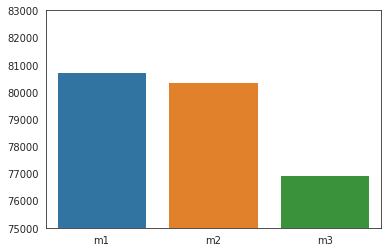

In [74]:
br1 = mae_model
br2 = mae_model_norm
br3 = mae_model_log_norm

#plt.bar(br1, br1,width = 50)
#plt.bar(br2, br2,width = 50)
#plt.bar(br3, br3,width = 50)
import seaborn as  sns
sns.barplot(x=['m1','m2','m3'],y=[br1,br2,br3])
plt.ylim([75000, 83000])

**Normal verideki tahnim gösterimi**





(-196600.0, 5844600.0, -196600.0, 5844600.0)

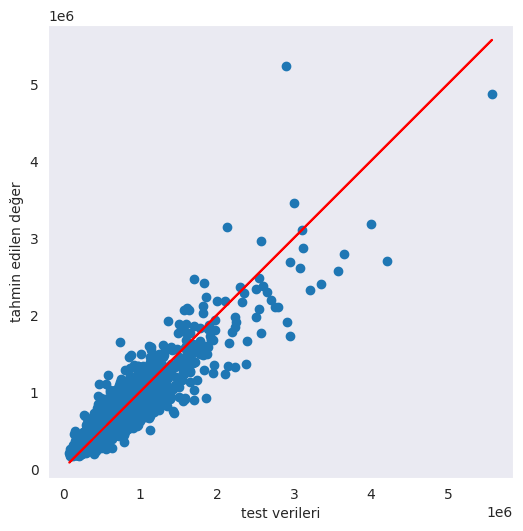

In [98]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, yhat)
plt.plot(y_test,y_test, color="red")
plt.xlabel('test verileri')
plt.ylabel("tahmin edilen değer")
plt.axis('equal')

## normalize edilmiş verideki tahmin gösterimi

(-196600.0, 5844600.0, -196600.0, 5844600.0)

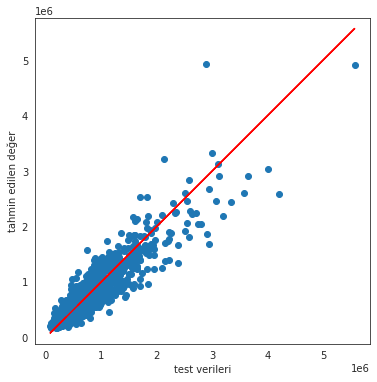

In [76]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, yhat_norm_reel)
plt.plot(y_test,y_test, color="red")
plt.xlabel('test verileri')
plt.ylabel("tahmin edilen değer")
plt.axis('equal')

## log normalize edilmiş verideki tahmin gösterimi

(-196600.0, 5844600.0, -196600.0, 5844600.0)

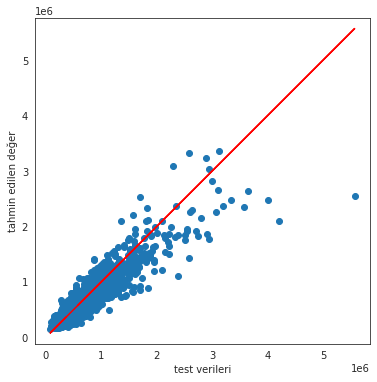

In [77]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_hat_log_norm_reel)
plt.plot(y_test,y_test, color="red")
plt.xlabel('test verileri')
plt.ylabel("tahmin edilen değer")
plt.axis('equal')

In [78]:
# --------------------------------

In [79]:
error1 = y_test - yhat

In [80]:
error1

17485     25131.84375
15164     -7022.21875
18449     26368.37500
6828      37540.31250
18281   -338409.75000
             ...     
12430    -42541.75000
2320     339377.00000
5419      46091.06250
9517    -138753.50000
12877     -7401.37500
Name: price, Length: 4323, dtype: float64

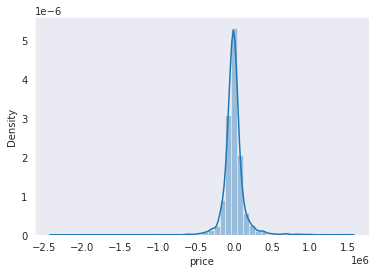

In [81]:
sns.set_style('dark')
sns.distplot(error1)

In [82]:
y_test.shape

(4323,)

In [83]:
yhat_norm_reel

array([[329827.47],
       [238124.12],
       [351687.1 ],
       ...,
       [597660.94],
       [640578.  ],
       [572824.44]], dtype=float32)

In [84]:
z = yhat_norm_reel.reshape(-1,4323)

In [85]:
z.shape

(1, 4323)

In [86]:
error2 = y_test.to_numpy().reshape(-1,4323) - z

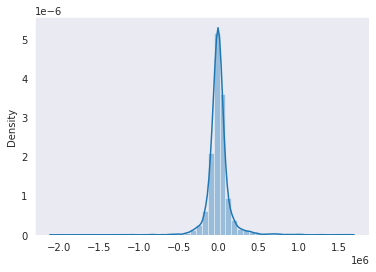

In [87]:
sns.set_style('dark')
sns.distplot(error2)

In [88]:
k = y_hat_log_norm_reel.reshape(-1,4323)

In [89]:
k.shape

(1, 4323)

In [90]:
error3 = y_test.to_numpy().reshape(-1,4323) - k

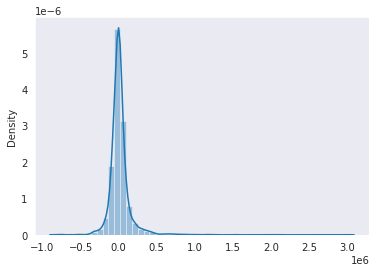

In [91]:
sns.set_style('dark')
sns.distplot(error3)

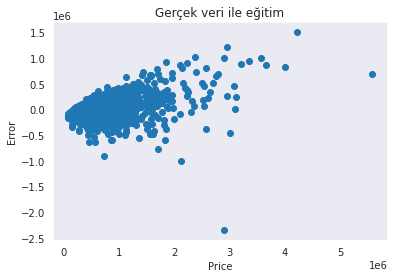

In [92]:
plt.scatter(y_test, error1)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Gerçek veri ile eğitim')
plt.xlabel('Price')
plt.ylabel('Error')
plt.show()

No handles with labels found to put in legend.


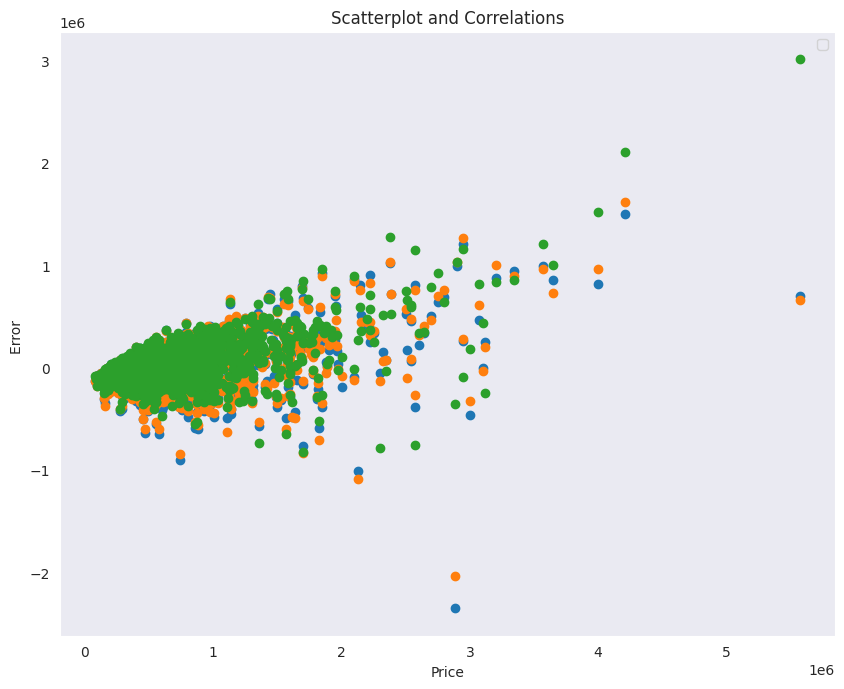

In [93]:
# Plot
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.scatter(y_test, error1)#, label=f'error1 - Correlation = {np.round(np.corrcoef(y_test,error1)[0,1], 2)}')
plt.scatter(y_test, error2)#, label=f'error2 - normalize Correlation = {np.round(np.corrcoef(y_test,error2)[0,1], 2)}')
plt.scatter(y_test, error3)#, label=f'error3 - log normalize Correlation = {np.round(np.corrcoef(y_test,error3)[0,1], 2)}')

# Plot
plt.title('Scatterplot and Correlations')
plt.xlabel("Price")
plt.ylabel("Error ")
plt.legend()
plt.show()

In [94]:
#----------------------------------------------------------------------------------------

In [95]:
error1

17485     25131.84375
15164     -7022.21875
18449     26368.37500
6828      37540.31250
18281   -338409.75000
             ...     
12430    -42541.75000
2320     339377.00000
5419      46091.06250
9517    -138753.50000
12877     -7401.37500
Name: price, Length: 4323, dtype: float64

In [96]:
error2

array([[  35172.53125,  -13124.125  ,   33262.90625, ...,   56339.0625 ,
        -160578.     ,    2175.5625 ]])

In [97]:
error3

array([[  16575.90625 ,    6252.171875,   27269.96875 , ...,
          58837.125   , -157583.75    ,   -6717.5625  ]])

## MLPRegressor

In [99]:
reg1 = MLPRegressor(hidden_layer_sizes=(338, 338, 50), 
                  activation='relu', solver='adam', max_iter = 200, random_state = 56, tol=0.0000000001 , verbose = True).fit(X_train,y_train)
reg1_pred = reg1.predict(X_test)

Iteration 1, loss = 84542504931.22061157
Iteration 2, loss = 62119258570.36652374
Iteration 3, loss = 52218419220.33666229
Iteration 4, loss = 32935839923.85705566
Iteration 5, loss = 29372456692.54829788
Iteration 6, loss = 28300064609.18587494
Iteration 7, loss = 28228695677.65219879
Iteration 8, loss = 28054047134.21954346
Iteration 9, loss = 27955130141.68308640
Iteration 10, loss = 27416751471.56708908
Iteration 11, loss = 27137040109.31356812
Iteration 12, loss = 27191334907.14335251
Iteration 13, loss = 27507642815.44256592
Iteration 14, loss = 26910618044.66550446
Iteration 15, loss = 26916274225.79692459
Iteration 16, loss = 27224708909.83959579
Iteration 17, loss = 26982445008.17749023
Iteration 18, loss = 26612588142.96717072
Iteration 19, loss = 26446938330.24058151
Iteration 20, loss = 26426052513.99584198
Iteration 21, loss = 27096237470.08538818
Iteration 22, loss = 26426971193.78058624
Iteration 23, loss = 26341344111.59817505
Iteration 24, loss = 26692888514.74222946
I

In [100]:
reg1

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(338, 338, 50), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=56, shuffle=True, solver='adam',
             tol=1e-10, validation_fraction=0.1, verbose=True,
             warm_start=False)

In [101]:
mae1 = mean_absolute_error(y_test,reg1_pred)
print("MAE: ", mae1)
mse1 = mean_squared_error(y_test,reg1_pred)
print("MSE: ", mse1)
rmse1 = np.sqrt(mse)
print("RMSE: ", rmse1)


MAE:  148161.3048097788
MSE:  49688579553.178764
RMSE:  137247.04792438407


In [102]:
reg1.score(X_test, y_test)

0.6357985099537139

In [103]:
reg2 = MLPRegressor(hidden_layer_sizes=(338, 338, 50), 
                  activation='relu', solver='adam', max_iter = 200, random_state = 56, tol=0.0000000001 , verbose = True).fit(X_train_norm,y_train_norm)
reg2_pred = reg2.predict(X_test_norm)

Iteration 1, loss = 0.00127739
Iteration 2, loss = 0.00033578
Iteration 3, loss = 0.00029309
Iteration 4, loss = 0.00028065
Iteration 5, loss = 0.00026025
Iteration 6, loss = 0.00024566
Iteration 7, loss = 0.00023475
Iteration 8, loss = 0.00024281
Iteration 9, loss = 0.00023707
Iteration 10, loss = 0.00022245
Iteration 11, loss = 0.00021539
Iteration 12, loss = 0.00021482
Iteration 13, loss = 0.00021901
Iteration 14, loss = 0.00020652
Iteration 15, loss = 0.00020796
Iteration 16, loss = 0.00020336
Iteration 17, loss = 0.00019893
Iteration 18, loss = 0.00019327
Iteration 19, loss = 0.00019129
Iteration 20, loss = 0.00018900
Iteration 21, loss = 0.00018971
Iteration 22, loss = 0.00018415
Iteration 23, loss = 0.00018298
Iteration 24, loss = 0.00018679
Iteration 25, loss = 0.00017604
Iteration 26, loss = 0.00017516
Iteration 27, loss = 0.00017367
Iteration 28, loss = 0.00016637
Iteration 29, loss = 0.00016542
Iteration 30, loss = 0.00016595
Iteration 31, loss = 0.00016429
Iteration 32, los

In [104]:
reg2_pred1  = reg2_pred.reshape(-1,1)

In [105]:
reg2_pred_reel = scale_y_train.inverse_transform(reg2_pred1)

In [106]:
reg2_pred_reel

array([[344629.9906152 ],
       [188779.73814098],
       [414333.91408264],
       ...,
       [611056.76917665],
       [653533.78225921],
       [564009.42030213]])

In [107]:
mae2 = mean_absolute_error(y_test,reg2_pred_reel)
print("MAE: ", mae2)
mse2 = mean_squared_error(y_test,reg2_pred_reel)
print("MSE: ", mse2)
rmse2 = np.sqrt(mse)
print("RMSE: ", rmse2)

MAE:  68931.9500921956
MSE:  14636215071.035591
RMSE:  137247.04792438407


In [108]:
a = mae_model - mae2

In [109]:
a

11784.958687876104

In [110]:
reg2.score(X_test_norm, y_test_norm)

0.8927211969944903

In [111]:
X_train_log_normson = np.nan_to_num(X_train_log_norm)
X_test_log_normson = np.nan_to_num(X_test_log_norm)


In [112]:
reg3 = MLPRegressor(hidden_layer_sizes=(338, 338, 50), 
                  activation='relu', solver='adam', max_iter = 200, random_state = 56, tol=0.0000000001 , verbose = True)
reg3.fit(X_train_log_normson,y_train_log_norm)
reg3_pred = reg3.predict(X_test_log_normson)

Iteration 1, loss = 0.00317366
Iteration 2, loss = 0.00130308
Iteration 3, loss = 0.00112938
Iteration 4, loss = 0.00099945
Iteration 5, loss = 0.00093707
Iteration 6, loss = 0.00092970
Iteration 7, loss = 0.00086836
Iteration 8, loss = 0.00088432
Iteration 9, loss = 0.00085831
Iteration 10, loss = 0.00084998
Iteration 11, loss = 0.00085181
Iteration 12, loss = 0.00080519
Iteration 13, loss = 0.00081213
Iteration 14, loss = 0.00078955
Iteration 15, loss = 0.00086437
Iteration 16, loss = 0.00078605
Iteration 17, loss = 0.00077661
Iteration 18, loss = 0.00078125
Iteration 19, loss = 0.00075492
Iteration 20, loss = 0.00077337
Iteration 21, loss = 0.00076399
Iteration 22, loss = 0.00075421
Iteration 23, loss = 0.00075076
Iteration 24, loss = 0.00073354
Iteration 25, loss = 0.00074587
Iteration 26, loss = 0.00075235
Iteration 27, loss = 0.00074359
Iteration 28, loss = 0.00073335
Iteration 29, loss = 0.00071229
Iteration 30, loss = 0.00071301
Iteration 31, loss = 0.00069541
Iteration 32, los

In [113]:
reg3_pred

array([0.32737866, 0.22955138, 0.31842193, ..., 0.45196499, 0.43750482,
       0.44114098])

In [114]:
reg3_pred1  = reg3_pred.reshape(-1,1)

In [115]:
reg3_pred_reel = scale_y_train_log.inverse_transform(reg3_pred1)

In [116]:
reg3_pred_reel

array([[12.74150259],
       [12.28841802],
       [12.70001969],
       ...,
       [13.31852098],
       [13.25154905],
       [13.26838983]])

In [117]:
reg3_pred_reel = (math.e)**reg3_pred_reel

In [118]:
reg3_pred_reel = reg3_pred_reel.reshape(1,-1)

In [119]:
reg3_pred_reel

array([[341636.50214706, 217166.15350377, 327754.35610457, ...,
        608359.32400511, 568950.69156852, 578613.39682047]])

In [120]:
reg3_pred_reel2=np.squeeze(reg3_pred_reel)

In [121]:
mae3 = mean_absolute_error(y_test,reg3_pred_reel2)
print("MAE: ", mae3)
mse3 = mean_squared_error(y_test,reg3_pred_reel2)
print("MSE: ", mse3)
rmse3 = np.sqrt(mse)
print("RMSE: ", rmse3)

MAE:  68360.82077564782
MSE:  14032515351.787653
RMSE:  137247.04792438407


In [122]:
reg3.score(X_test_log_normson, y_test_log_norm)

0.8496254886702748

(66000.0, 150000.0)

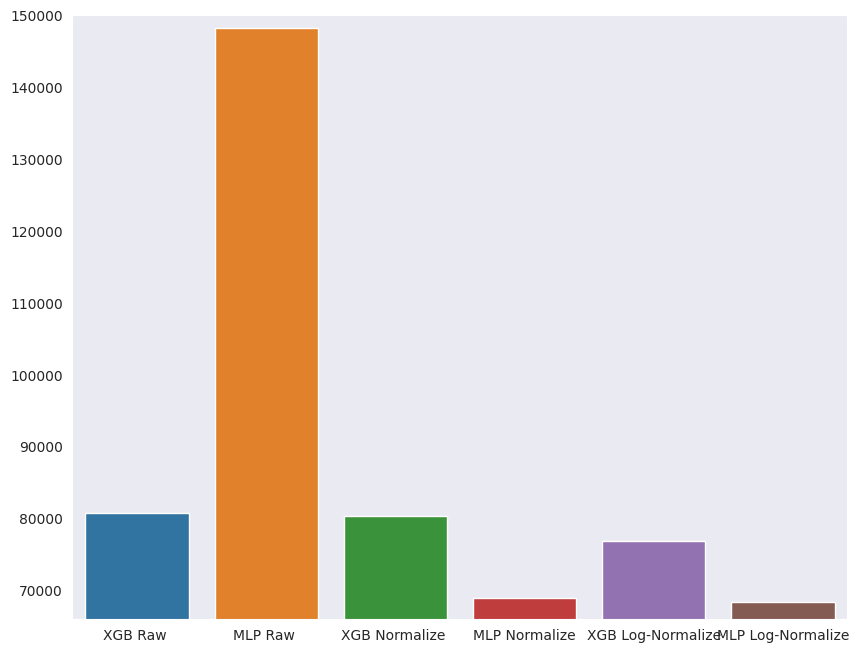

In [123]:
br1 = mae_model
br2 = mae_model_norm
br3 = mae_model_log_norm
brn1 = mae1
brn2 = mae2
brn3 = mae3

import seaborn as  sns
sns.barplot(x=['XGB Raw ','MLP Raw ','XGB Normalize ',"MLP Normalize","XGB Log-Normalize","MLP Log-Normalize"],y=[br1,mae1,br2,mae2,br3,mae3])
plt.ylim([66000, 150000])


**Kıyaslama işleminin yapılması**

In [124]:
X_train_log_norm

array([[0.45640198, 0.570157  , 0.56658521, ..., 0.57428737, 0.64559296,
        0.45313988],
       [0.31154282, 0.31546488, 0.13681763, ..., 0.89746126, 0.36172043,
        0.28306009],
       [0.45640198, 0.570157  , 0.57707911, ..., 0.63070933, 0.76158084,
        0.46669337],
       ...,
       [0.39312326, 0.570157  , 0.55161057, ..., 0.83621967, 0.58867261,
        0.36365858],
       [0.31154282, 0.41702188, 0.45307972, ..., 0.81800563, 0.34508656,
        0.22981737],
       [0.39312326, 0.46039942, 0.34393723, ..., 0.65559146, 0.57769095,
        0.37618753]])

In [125]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3856,4,2.50,2880,23994,2.0,0,3,3,9,2880,0,2002,0,98022,47.2124,122.005,2470,17009
5010,2,1.00,620,4455,1.0,0,0,3,6,620,0,1927,0,98117,47.6877,122.395,1180,5000
18050,4,2.50,2990,16809,2.0,0,0,3,11,2990,0,1990,0,98077,47.7123,122.073,3340,18752
570,4,2.50,1830,5612,2.0,0,0,3,7,1830,0,2003,0,98038,47.3572,122.015,1830,5998
8556,4,2.50,3320,9380,2.0,0,3,3,10,3320,0,1988,0,98006,47.5655,122.114,2870,11779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5520,3,1.75,2100,5000,1.5,0,0,3,8,2100,0,1916,0,98117,47.6776,122.360,1830,4200
3046,3,1.00,1330,10500,1.0,0,0,3,7,960,370,1963,0,98034,47.7204,122.196,1460,11550
20463,3,2.50,2730,7136,2.0,0,0,3,8,2730,0,2012,0,98198,47.3938,122.321,2130,8932
18638,2,1.50,1920,3408,1.0,0,0,4,7,960,960,1912,0,98122,47.6118,122.299,1130,3408


In [126]:
X_train_norm_sum = np.sum(X_train_norm)
X_train_norm_has_nan = np.isnan(X_train_norm_sum)
print(X_train_norm_has_nan)


False


In [127]:
X_train_log_norm_sum = np.sum(X_train_log_norm)
X_train_log_norm_has_nan = np.isnan(X_train_log_norm_sum)
print(X_train_log_norm_has_nan)


False


In [128]:
X_train_log_norm

array([[0.45640198, 0.570157  , 0.56658521, ..., 0.57428737, 0.64559296,
        0.45313988],
       [0.31154282, 0.31546488, 0.13681763, ..., 0.89746126, 0.36172043,
        0.28306009],
       [0.45640198, 0.570157  , 0.57707911, ..., 0.63070933, 0.76158084,
        0.46669337],
       ...,
       [0.39312326, 0.570157  , 0.55161057, ..., 0.83621967, 0.58867261,
        0.36365858],
       [0.31154282, 0.41702188, 0.45307972, ..., 0.81800563, 0.34508656,
        0.22981737],
       [0.39312326, 0.46039942, 0.34393723, ..., 0.65559146, 0.57769095,
        0.37618753]])

In [129]:
#############################################################

(-196600.0, 5844600.0, -196600.0, 5844600.0)

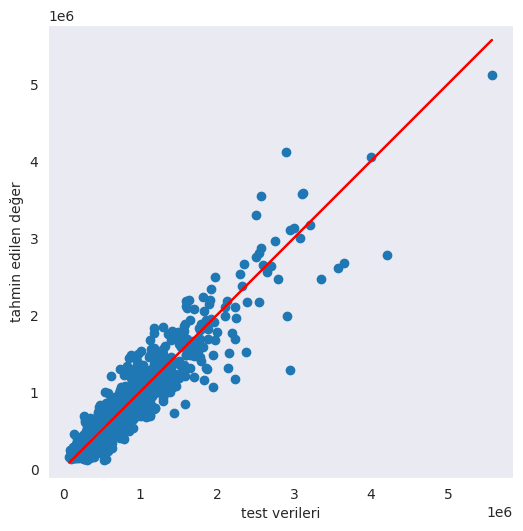

In [130]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, reg3_pred_reel2)
plt.plot(y_test,y_test, color="red")
plt.xlabel('test verileri')
plt.ylabel("tahmin edilen değer")
plt.axis('equal')

(-196600.0, 5844600.0, -197544.48707315896, 5844644.9755749125)

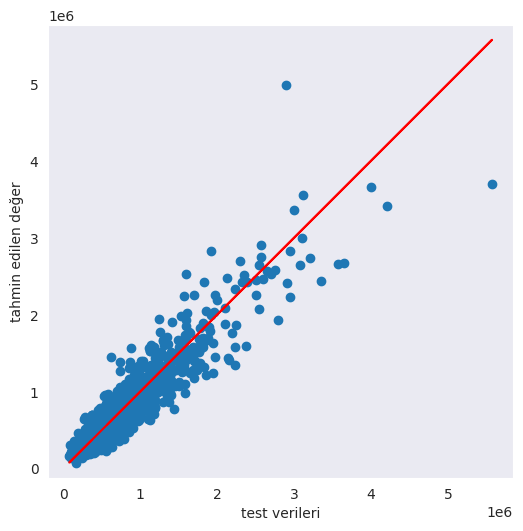

In [131]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, reg2_pred_reel)
plt.plot(y_test,y_test, color="red")
plt.xlabel('test verileri')
plt.ylabel("tahmin edilen değer")
plt.axis('equal')

(-196600.0, 5844600.0, -198310.89413184213, 5880528.776768684)

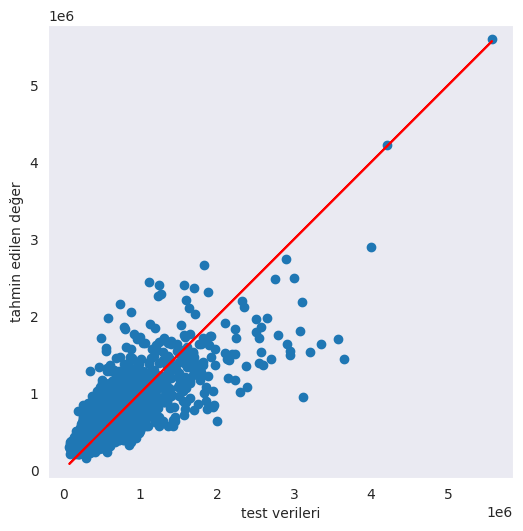

In [132]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, reg1_pred)
plt.plot(y_test,y_test, color="red")
plt.xlabel('test verileri')
plt.ylabel("tahmin edilen değer")
plt.axis('equal')

In [133]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17485,4,2.50,2800,6820,2.0,0,0,4,7,2800,0,1997,0,98042,47.3695,122.108,2060,6820
15164,3,1.00,1250,10200,1.0,0,0,3,6,1250,0,1965,0,98178,47.4902,122.256,1800,8283
18449,3,1.00,1540,7740,1.0,0,0,4,7,1540,0,1909,0,98126,47.5220,122.375,1220,7740
6828,4,1.50,1910,5000,1.5,0,0,3,7,1610,300,1912,0,98105,47.6597,122.290,2170,5000
18281,3,2.50,3320,11875,1.0,0,0,5,10,3320,0,1979,0,98034,47.7212,122.260,3730,11875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12430,3,1.00,860,6380,1.5,0,0,4,7,860,0,1927,0,98115,47.6942,122.315,1250,6380
2320,3,3.50,3780,8295,2.0,0,0,3,9,2430,1350,1951,0,98112,47.6394,122.290,3780,9127
5419,4,2.50,2240,7540,1.0,0,0,3,8,1540,700,1962,0,98115,47.6965,122.308,1960,7250
9517,5,2.75,2550,7725,1.0,0,0,5,8,1390,1160,1967,0,98056,47.5388,122.171,2450,7725


In [134]:
data['long'] = data['long'].abs()

In [135]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,122.069,1410,1287


In [136]:
X_test_log

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17485,1.609438,1.252763,7.937732,8.827761,1.098612,0.0,0.0,1.609438,2.079442,7.937732,0.000000,7.599902,0.0,11.493161,3.878869,4.813062,7.630947,8.827761
15164,1.386294,0.693147,7.131699,9.230241,0.693147,0.0,0.0,1.386294,1.945910,7.131699,0.000000,7.583756,0.0,11.494548,3.881362,4.814263,7.496097,9.022081
18449,1.386294,0.693147,7.340187,8.954286,0.693147,0.0,0.0,1.609438,2.079442,7.340187,0.000000,7.554859,0.0,11.494018,3.882017,4.815228,7.107425,8.954286
6828,1.609438,0.916291,7.555382,8.517393,0.916291,0.0,0.0,1.386294,2.079442,7.384610,5.707110,7.556428,0.0,11.493804,3.884851,4.814539,7.682943,8.517393
18281,1.386294,1.252763,8.108021,9.382275,0.693147,0.0,0.0,1.791759,2.397895,8.108021,0.000000,7.590852,0.0,11.493080,3.886114,4.814296,8.224432,9.382275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12430,1.386294,0.693147,6.758095,8.761080,0.916291,0.0,0.0,1.609438,2.079442,6.758095,0.000000,7.564238,0.0,11.493906,3.885560,4.814742,7.131699,8.761080
2320,1.386294,1.504077,8.237744,9.023529,1.098612,0.0,0.0,1.386294,2.302585,7.796058,7.208600,7.576610,0.0,11.493875,3.884434,4.814539,8.237744,9.119102
5419,1.609438,1.252763,7.714677,8.928110,0.693147,0.0,0.0,1.386294,2.197225,7.340187,6.552508,7.582229,0.0,11.493906,3.885607,4.814685,7.581210,8.888895
9517,1.791759,1.321756,7.844241,8.952347,0.693147,0.0,0.0,1.791759,2.197225,7.237778,7.057037,7.584773,0.0,11.493304,3.882363,4.813574,7.804251,8.952347


In [137]:
X_test_log_norm

array([[0.45640198, 0.570157  , 0.55869848, ..., 0.65973789, 0.57582979,
        0.32618126],
       [0.39312326, 0.31546488, 0.33296173, ..., 0.78239607, 0.52397825,
        0.35317919],
       [0.39312326, 0.31546488, 0.39135073, ..., 0.8809131 , 0.3745281 ,
        0.34376004],
       ...,
       [0.45640198, 0.570157  , 0.49623015, ..., 0.82545722, 0.55670527,
        0.33467484],
       [0.50810445, 0.60155701, 0.53251549, ..., 0.71196851, 0.64246808,
        0.34349056],
       [0.45640198, 0.570157  , 0.4700496 , ..., 0.57594729, 0.58867261,
        0.29619847]])